In [ ]:
# 문제1. 이 제품은 너무 좋은데요. 정말 좋아요. 강추합니다. 이런 댓글을 입력했을때 긍정인지 부정인지 출력하는 것을 만들어라.
# 이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다.
# 함수를 만들어서 언어를 전달받아서 리턴결과가 긍정인지 부정인지 출력하라. 
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [94]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt   

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [7]:
total_data['lable']=np.select([total_data.ratings>3],[1],default= 0 )

In [9]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)

In [11]:
total_data1 = total_data[0:20000]
total_data2 = total_data[20000:40000]
total_data3 = total_data[40000:60000]
total_data4 = total_data[60000:80000]
total_data5 = total_data[80000:100000]
total_data6 = total_data[100000:120000]
total_data7 = total_data[120000:140000]
total_data8 = total_data[140000:160000]
total_data9 = total_data[160000:180000]
total_data10 = total_data[18000:199908]

In [12]:
train_data1, test_data1 = train_test_split(total_data1, test_size = 0.25, random_state = 42)

In [13]:
train_data2, test_data2 = train_test_split(total_data2, test_size = 0.25, random_state = 42)
train_data3, test_data3 = train_test_split(total_data3, test_size = 0.25, random_state = 42)
train_data4, test_data4 = train_test_split(total_data4, test_size = 0.25, random_state = 42)
train_data5, test_data5 = train_test_split(total_data5, test_size = 0.25, random_state = 42)
train_data6, test_data6 = train_test_split(total_data6, test_size = 0.25, random_state = 42)
train_data7, test_data7 = train_test_split(total_data7, test_size = 0.25, random_state = 42)
train_data8, test_data8 = train_test_split(total_data8, test_size = 0.25, random_state = 42)
train_data9, test_data9 = train_test_split(total_data9, test_size = 0.25, random_state = 42)
train_data10, test_data10 = train_test_split(total_data10, test_size = 0.25, random_state = 42)

In [14]:
train_data1['reviews'] = train_data1['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data2['reviews'] = train_data2['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data3['reviews'] = train_data3['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data4['reviews'] = train_data4['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data5['reviews'] = train_data5['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data6['reviews'] = train_data6['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data7['reviews'] = train_data7['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data8['reviews'] = train_data8['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data9['reviews'] = train_data9['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data10['reviews'] = train_data10['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [15]:
train_data1['reviews'].replace("",np.nan,inplace=True)
train_data2['reviews'].replace("",np.nan,inplace=True)
train_data3['reviews'].replace("",np.nan,inplace=True)
train_data4['reviews'].replace("",np.nan,inplace=True)
train_data5['reviews'].replace("",np.nan,inplace=True)
train_data6['reviews'].replace("",np.nan,inplace=True)
train_data7['reviews'].replace("",np.nan,inplace=True)
train_data8['reviews'].replace("",np.nan,inplace=True)
train_data9['reviews'].replace("",np.nan,inplace=True)
train_data10['reviews'].replace("",np.nan,inplace=True)

In [37]:
test_data1['reviews']=test_data1['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data2['reviews']=test_data2['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data3['reviews']=test_data3['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data4['reviews']=test_data4['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data5['reviews']=test_data5['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data6['reviews']=test_data6['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data7['reviews']=test_data7['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data8['reviews']=test_data8['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data9['reviews']=test_data9['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data10['reviews']=test_data10['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [38]:
test_data1['reviews'].replace("", np.nan, inplace=True)
test_data2['reviews'].replace("", np.nan, inplace=True)
test_data3['reviews'].replace("", np.nan, inplace=True)
test_data4['reviews'].replace("", np.nan, inplace=True)
test_data5['reviews'].replace("", np.nan, inplace=True)
test_data6['reviews'].replace("", np.nan, inplace=True)
test_data7['reviews'].replace("", np.nan, inplace=True)
test_data8['reviews'].replace("", np.nan, inplace=True)
test_data9['reviews'].replace("", np.nan, inplace=True)
test_data10['reviews'].replace("", np.nan, inplace=True)

In [52]:
okt = Okt()

In [53]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','.','..']

In [54]:
train_data1['tokenized']=train_data1['reviews'].apply(okt.morphs)

In [55]:
train_data2['tokenized']=train_data2['reviews'].apply(okt.morphs)

In [56]:
train_data3['tokenized']=train_data3['reviews'].apply(okt.morphs)

In [57]:
train_data4['tokenized']=train_data4['reviews'].apply(okt.morphs)

In [58]:
train_data5['tokenized']=train_data5['reviews'].apply(okt.morphs)

In [59]:
train_data6['tokenized']=train_data6['reviews'].apply(okt.morphs)

In [60]:
train_data7['tokenized']=train_data7['reviews'].apply(okt.morphs)

In [61]:
train_data8['tokenized']=train_data8['reviews'].apply(okt.morphs)

In [62]:
train_data9['tokenized']=train_data9['reviews'].apply(okt.morphs)

In [63]:
train_data10['tokenized']=train_data10['reviews'].apply(okt.morphs)

In [64]:
train_data1['tokenized']=train_data1['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data2['tokenized']=train_data2['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data3['tokenized']=train_data3['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data4['tokenized']=train_data4['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data5['tokenized']=train_data5['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data6['tokenized']=train_data6['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data7['tokenized']=train_data7['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data8['tokenized']=train_data8['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data9['tokenized']=train_data9['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
train_data10['tokenized']=train_data10['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [71]:
test_data1['tokenized'] = test_data1['reviews'].apply(okt.morphs)

In [72]:
test_data2['tokenized'] = test_data2['reviews'].apply(okt.morphs)

In [73]:
test_data3['tokenized'] = test_data3['reviews'].apply(okt.morphs)

In [74]:
test_data4['tokenized'] = test_data4['reviews'].apply(okt.morphs)

In [76]:
test_data5['tokenized'] = test_data5['reviews'].apply(okt.morphs)

In [77]:
test_data6['tokenized'] = test_data6['reviews'].apply(okt.morphs)

In [78]:
test_data7['tokenized'] = test_data7['reviews'].apply(okt.morphs)

In [79]:
test_data8['tokenized'] = test_data8['reviews'].apply(okt.morphs)

In [80]:
test_data9['tokenized'] = test_data9['reviews'].apply(okt.morphs)

In [81]:
test_data10['tokenized'] = test_data10['reviews'].apply(okt.morphs)

In [82]:
test_data1['tokenized'] = test_data1['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data2['tokenized'] = test_data2['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data3['tokenized'] = test_data3['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data4['tokenized'] = test_data4['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data5['tokenized'] = test_data5['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data6['tokenized'] = test_data6['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data7['tokenized'] = test_data7['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data8['tokenized'] = test_data8['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data9['tokenized'] = test_data9['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data10['tokenized'] = test_data10['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [83]:
train_Data = pd.concat([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7,train_data8,train_data9,train_data10])    

In [84]:
test_Data = pd.concat([test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10])    

In [126]:
X_train = train_Data['tokenized'].values
y_train = train_Data['lable'].values
X_test= test_Data['tokenized'].values
y_test = test_Data['lable'].values

In [127]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [128]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 108288
등장 빈도가 2번 이하인 희귀 단어의 수: 63656
단어 집합에서 희귀 단어의 비율: 58.78398345153665
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.7521878117316376


In [129]:
vocab_size = total_cnt - rare_cnt + 2          # 2를 더한 이유는 0이라는 패딩토큰에 OOV 토큰 하나가 더 추가되었기 때문이다
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 44634


In [130]:
model.compile(loss='mean_squared_error', optimizer='adam')              
early_stop = EarlyStopping(monitor='loss', patience=5)      
checkpoint = ModelCheckpoint('lstm2_checkpoint.h5',
                             monitor='loss', verbose=1,
                             save_best_only=True, mode='auto') 

In [131]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')                        
tokenizer.fit_on_texts(X_train)

In [92]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 77
리뷰의 평균 길이 : 13.07044147499733


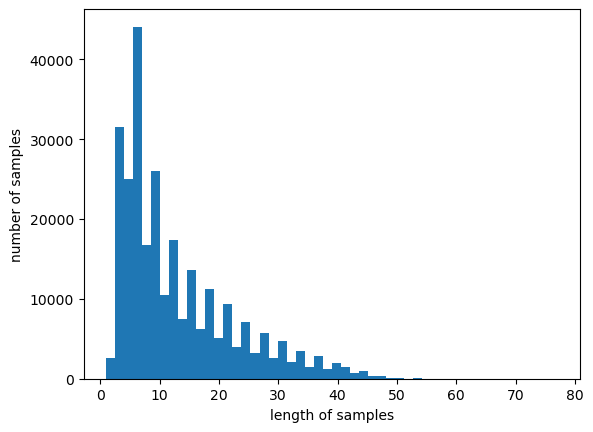

In [93]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [95]:
X_train = pad_sequences(X_train, maxlen = 77)  # 최대길이  77
X_test = pad_sequences(X_test, maxlen = 77)     # 임베딩을 위해서 패딩을 한다. 

In [99]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [100]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [101]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/30
3619/3620 [============================>.] - ETA: 0s - loss: 0.2663 - acc: 0.8991
Epoch 1: val_acc improved from -inf to 0.91714, saving model to best_model.h5
3620/3620 [==============================] - 273s 75ms/step - loss: 0.2663 - acc: 0.8991 - val_loss: 0.2284 - val_acc: 0.9171
Epoch 2/30
   1/3620 [..............................] - ETA: 5:04 - loss: 0.1017 - acc: 0.9833

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3619/3620 [============================>.] - ETA: 0s - loss: 0.2084 - acc: 0.9268
Epoch 2: val_acc improved from 0.91714 to 0.92728, saving model to best_model.h5
3620/3620 [==============================] - 279s 77ms/step - loss: 0.2084 - acc: 0.9268 - val_loss: 0.2050 - val_acc: 0.9273
Epoch 3/30
3619/3620 [============================>.] - ETA: 0s - loss: 0.1810 - acc: 0.9382
Epoch 3: val_acc improved from 0.92728 to 0.93210, saving model to best_model.h5
3620/3620 [==============================] - 281s 78ms/step - loss: 0.1810 - acc: 0.9382 - val_loss: 0.1948 - val_acc: 0.9321
Epoch 4/30
3619/3620 [============================>.] - ETA: 0s - loss: 0.1599 - acc: 0.9470
Epoch 4: val_acc improved from 0.93210 to 0.93897, saving model to best_model.h5
3620/3620 [==============================] - 278s 77ms/step - loss: 0.1599 - acc: 0.9470 - val_loss: 0.1789 - val_acc: 0.9390
Epoch 5/30
3619/3620 [============================>.] - ETA: 0s - loss: 0.1424 - acc: 0.9539
Epoch 5: val_acc i

KeyboardInterrupt: 

In [102]:
loaded_model = load_model('best_model.h5')

In [103]:
loaded_model.evaluate(X_test, y_test)

2828/2828 [==============================] - 55s 19ms/step - loss: 0.1792 - acc: 0.9413


[0.17918553948402405, 0.9413110613822937]

In [ ]:
def good_and_bad(string):
    

In [109]:

repla

'이 제품은 너무 좋은데요 정말 좋아요 강추합니다'

In [111]:

repla2

['이', '제품', '은', '너무', '좋은데', '요', '정말', '좋아요', '강', '추합니다']

In [148]:
def good_and_bad(input_text):
    repla = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", input_text)
    repla2 =okt.morphs(repla)
    stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','.','..']
    repla3 = []
    for item in repla2: 
        if item not in stopwords:
            repla3.append(item)
    repla4 = [item for sublist in tokenizer.texts_to_sequences(repla3) for item in sublist]
    repla5  = pad_sequences([repla4] , maxlen = 77) 
    ans = loaded_model.predict(repla5)
    if ans[0][0]>0.5:
        print('긍정입니다.')
        print(f'출력결과{ans[0][0]*100}')
    else:
        print('부정입니다.')
        print(f'출력결과{ans[0][0]*100}')

In [150]:
good_and_bad('이 제품은 너무 좋은데요. 정말 좋아요. 강추합니다.')
good_and_bad('이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다.')

1/1 [==============================] - 0s 25ms/step
긍정입니다.
출력결과98.92106652259827
1/1 [==============================] - 0s 22ms/step
부정입니다.
출력결과0.9549354203045368


In [165]:
good_and_bad()

1/1 [==============================] - 0s 25ms/step
부정입니다.
출력결과1.425912231206894
